In [6]:
import sys                      # system tools 

import numpy as np              # numerical computing with arrays 
import pandas as pd             # dataframe as in R

import matplotlib.pyplot as plt # ploting 
import matplotlib as mpl        # ploting 
import seaborn as sns           # ploting 

from matplotlib.ticker import MultipleLocator, FormatStrFormatter

sys.path.append(r"../code")
import ccolors                  # colors from colorbrewer 

import matplotlibCharts         # own library for composite charts

import os                       # operating system io commands 
import itertools                # functonal programming tools 

%matplotlib inline

In [7]:
ai2 = pd.read_hdf('../trajData/ai21.hdf', 'trajectories')
#ai2 = pd.read_hdf(r"C:\Users\mxyntarakis\OneDrive\atdm_trajectory\task 6\ai21.hdf", "trajectories")

In [8]:
OUT_FOLDER = r"..\outputs\model"

In [9]:
START_TIME = np.datetime64('2005-04-13 17:00:00')
END_TIME   = np.datetime64('2005-04-13 17:30:00')

LCR_MAX_RATE = 72000 

In [10]:
ai2.columns

Index(['did', 'oid', 'ent', 'sectionId', 'laneIndex', 'xCoord', 'yCoord',
       'timeSta', 'speed', 'travelledDistance', 'acceleration', 'time',
       'laneChange', 'dist_along', 'dist_headway', 'precedingVeh', 'xCoordp',
       'yCoordp', 'dist_headway2', 'mdensity', 'spacebin', 'timebin'],
      dtype='object')

In [11]:
ai2.head()

,did,oid,ent,sectionId,laneIndex,xCoord,yCoord,timeSta,speed,travelledDistance,...,laneChange,dist_along,dist_headway,precedingVeh,xCoordp,yCoordp,dist_headway2,mdensity,spacebin,timebin
0,10363595,1021,1648,10237476,6,6042637.69,2134625.72,17999.2,7.12,1014.54,...,0,1596.281410,NaN,NaN,NaN,NaN,NaN,NaN,7,2005-04-13 17:00:00
1,10363595,1021,1649,10237476,6,6042637.38,2134627.77,17999.4,7.00,1015.17,...,0,1598.354599,NaN,NaN,NaN,NaN,NaN,NaN,7,2005-04-13 17:00:00
2,10363595,1021,1650,10237476,6,6042637.08,2134629.77,17999.6,6.80,1015.79,...,0,1600.376833,NaN,NaN,NaN,NaN,NaN,NaN,8,2005-04-13 17:00:00
3,10363595,1021,1651,10237476,6,6042636.80,2134631.71,17999.8,6.56,1016.38,...,0,1602.336639,NaN,NaN,NaN,NaN,NaN,NaN,8,2005-04-13 17:00:00
4,10363595,1021,1652,10237476,6,6042636.51,2134633.61,18000.0,6.58,1016.97,...,0,1604.258561,NaN,NaN,NaN,NaN,NaN,NaN,8,2005-04-13 17:05:00


In [12]:
ai2.isnull().sum()

did                      0
oid                      0
ent                      0
sectionId                0
laneIndex                0
xCoord                   0
yCoord                   0
timeSta                  0
speed                    0
travelledDistance        0
acceleration             0
time                     0
laneChange               0
dist_along               0
dist_headway         63028
precedingVeh         63035
xCoordp              63035
yCoordp              63035
dist_headway2        63035
mdensity             63035
spacebin                 0
timebin                  0
dtype: int64

In [13]:
ai2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500474 entries, 0 to 1500473
Data columns (total 22 columns):
did                  1500474 non-null int64
oid                  1500474 non-null int64
ent                  1500474 non-null int64
sectionId            1500474 non-null int64
laneIndex            1500474 non-null int64
xCoord               1500474 non-null float64
yCoord               1500474 non-null float64
timeSta              1500474 non-null float64
speed                1500474 non-null float64
travelledDistance    1500474 non-null float64
acceleration         1500474 non-null float64
time                 1500474 non-null datetime64[ns]
laneChange           1500474 non-null int64
dist_along           1500474 non-null float64
dist_headway         1437446 non-null float64
precedingVeh         1437439 non-null float64
xCoordp              1437439 non-null float64
yCoordp              1437439 non-null float64
dist_headway2        1437439 non-null float64
mdensity          

In [14]:
ai2.oid.unique().shape

(2630,)

In [15]:
ai2.time.min(), ai2.time.max()

(Timestamp('2005-04-13 16:59:59.200000'),
 Timestamp('2005-04-13 17:29:59.800000'))

In [16]:
start_time = np.datetime64('2005-04-13 17:00:00')
end_time   = np.datetime64('2005-04-13 17:30:00')

ai2 = ai2[(ai2.time >= start_time) & (ai2.time < end_time)]

In [17]:
ai2.time.min(), ai2.time.max()

(Timestamp('2005-04-13 17:00:00'), Timestamp('2005-04-13 17:29:59.800000'))

In [18]:
ai2['laneIndex'] = 8 - ai2['laneIndex']

In [19]:
def describe(var, numerical=True, decimals=1):
    
    count = int(var.shape[0])
    na    = int(var.isnull().sum())
    
    if numerical: 
        
        var2 = var.dropna().values 
        mean = np.mean(var2)
        std  = np.std(var2)
        
        min_ =  np.min(var2)   
        pct5 =  np.percentile(var2, 5) 
        pct25 = np.percentile(var2, 25)
        pct50 = np.percentile(var2, 50)
        pct75 = np.percentile(var2, 75) 
        pct95 = np.percentile(var2, 95)

        max_ = np.max(var2)

        values = [count,   na,    mean,   std,   min_,  pct5,   pct25,  pct50,   pct75,    pct95, max_]
        values = [np.round(v, decimals) for v in values]
        #values.insert(na, 0)
        #values.insert(count, 0)
        index = ['count', 'NA', 'mean', 'std', 'min', 'ptc5', 'pct25', 'pct50', 'ptc75', 'pct95', 'max']
        
        df = pd.DataFrame({'stats':values}, index=index)
        
        return df
    else:
        raise Exception("Not implemented yet")


In [20]:
describe(ai2.speed)

,stats
count,1499888.0
NA,0.0
mean,8.9
std,8.4
min,0.0
ptc5,0.6
pct25,4.2
pct50,7.1
ptc75,10.6
pct95,27.1


In [21]:
describe(ai2.dist_along)

,stats
count,1499888.0
NA,0.0
mean,783.9
std,473.7
min,0.5
ptc5,87.6
pct25,377.8
pct50,730.1
ptc75,1196.7
pct95,1561.4


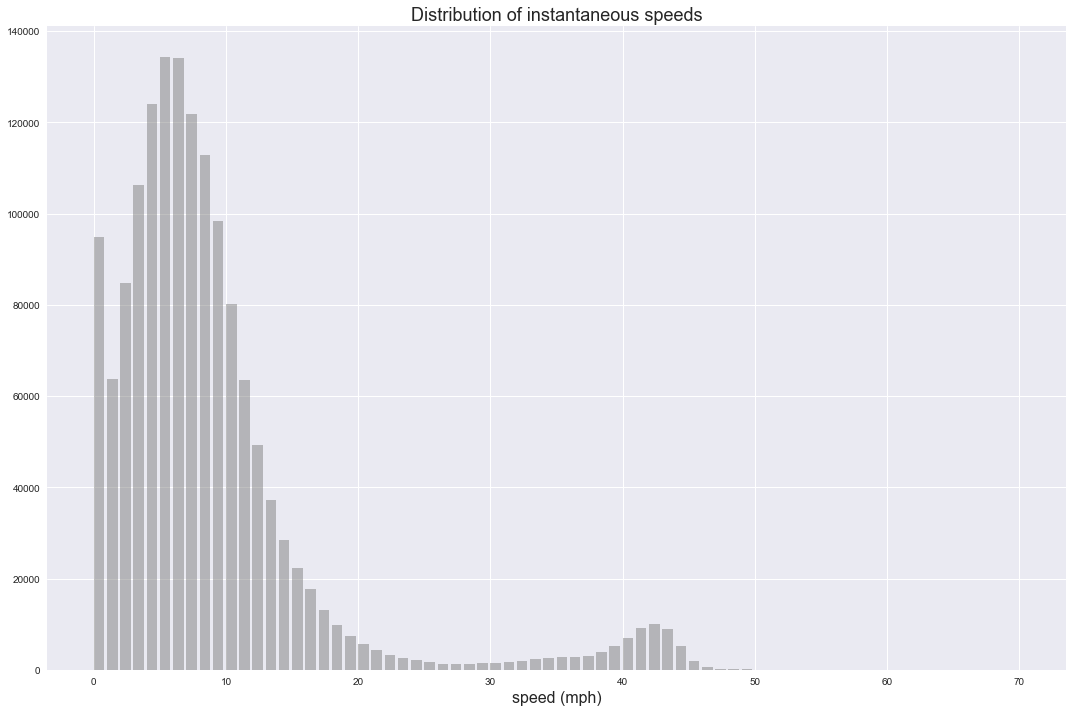

In [23]:
fig, ax =plt.subplots(figsize=(15,10))

ai2.speed.hist(ax=ax, bins=np.arange(0,71,1), figsize=(15,10), 
                      width=0.8, color='grey', alpha=0.5)
ax.set_title("Distribution of instantaneous speeds",fontsize=18)
ax.set_xlabel("speed (mph)",fontsize=16)
fig.tight_layout()
#fig.savefig(os.path.join(OUT_FOLDER, "inst speeds.png"))

In [ ]:
describe(ai2.acceleration)

Text(0.5,0,'acceleration (fpss)')

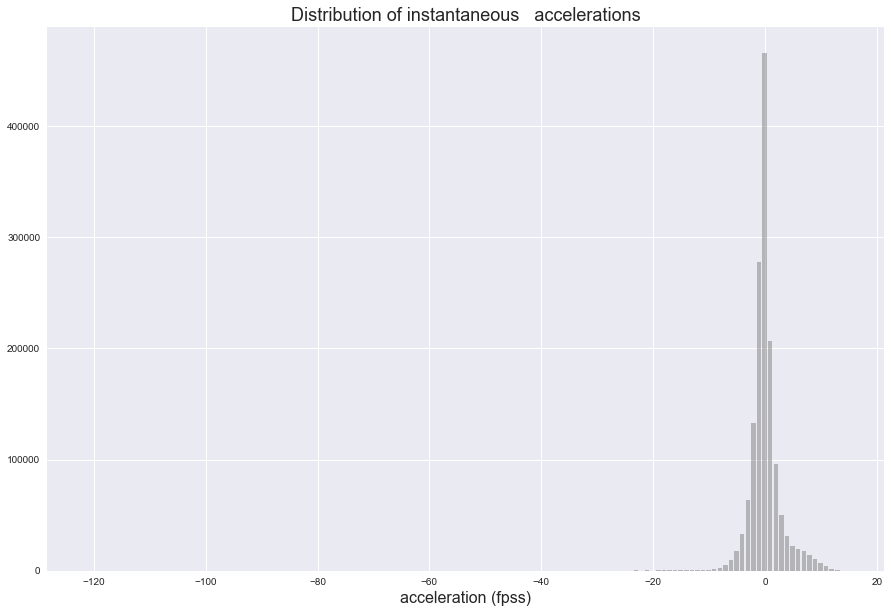

In [24]:
ax = ai2.acceleration.hist(bins=np.arange(-121.5,15.5,1), figsize=(15,10), 
                      width=0.8, color='grey', alpha=0.5)
ax.set_title("Distribution of instantaneous   accelerations",fontsize=18)
ax.set_xlabel("acceleration (fpss)",fontsize=16)

Text(0.5,0,'acceleration (fpss)')

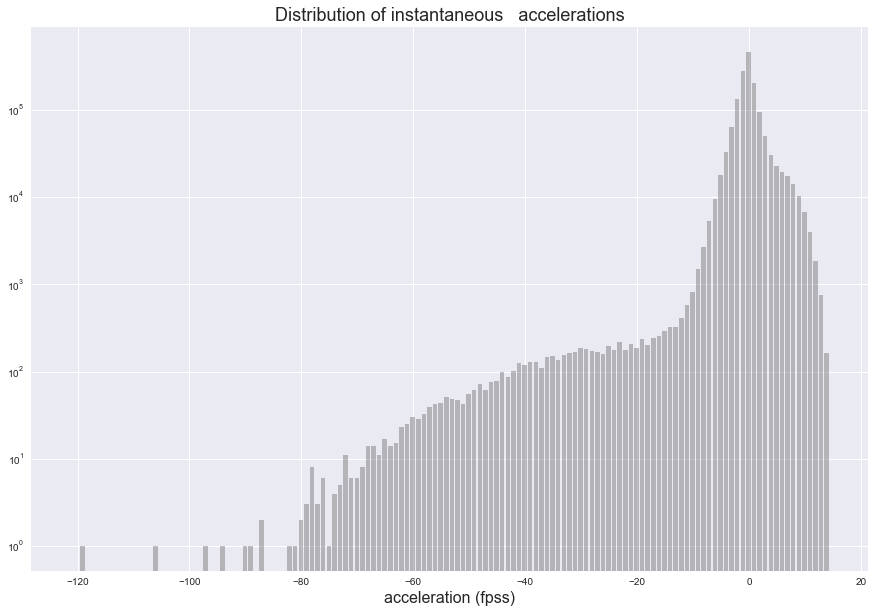

In [25]:
ax = ai2.acceleration.hist(bins=np.arange(-121.5,15.5,1), figsize=(15,10), 
                      width=0.8, color='grey', alpha=0.5, log=True)
ax.set_title("Distribution of instantaneous   accelerations",fontsize=18)
ax.set_xlabel("acceleration (fpss)",fontsize=16)

# Calculate average trajectory speeds 

In [27]:
ai2 = ai2.sort_values(['oid', 'time'])
tmp1 = (ai2.groupby('oid')[['timeSta', 'travelledDistance']]
        
        .first().reset_index()
        .rename(columns={'timeSta':'start', 'travelledDistance':'startDist'})
       )
tmp2 = (ai2.groupby('oid')[['timeSta', 'travelledDistance']]
        .last()
        .reset_index()
        .rename(columns={'timeSta':'end', 'travelledDistance':'endDist'})
       )
    
ai_times = pd.merge(tmp1, tmp2, on=['oid'])
#ai_times
ai_times['dur'] = ai_times.end - ai_times.start 
ai_times['dist'] = ai_times.endDist - ai_times.startDist 
ai_times['speed'] = (ai_times.dist / 1600.0) / (ai_times.dur / 3600.0)
ai_times.sort_values('dur', ascending=False, inplace=True)
#ai_times['dur']
ai_times.head()

,oid,start,startDist,end,endDist,dur,dist,speed
1815,3056,19460.2,527.08,19765.6,1031.36,305.4,504.28,3.715226
999,2240,18787.0,527.34,19063.4,1030.92,276.4,503.58,4.099331
1039,2280,18844.6,527.57,19120.8,1031.25,276.2,503.68,4.103114
1114,2355,18839.2,528.94,19113.4,1032.36,274.2,503.42,4.130908
1156,2397,18948.4,527.53,19218.0,1031.41,269.6,503.88,4.205230


In [28]:
ai_times = ai_times.dropna()

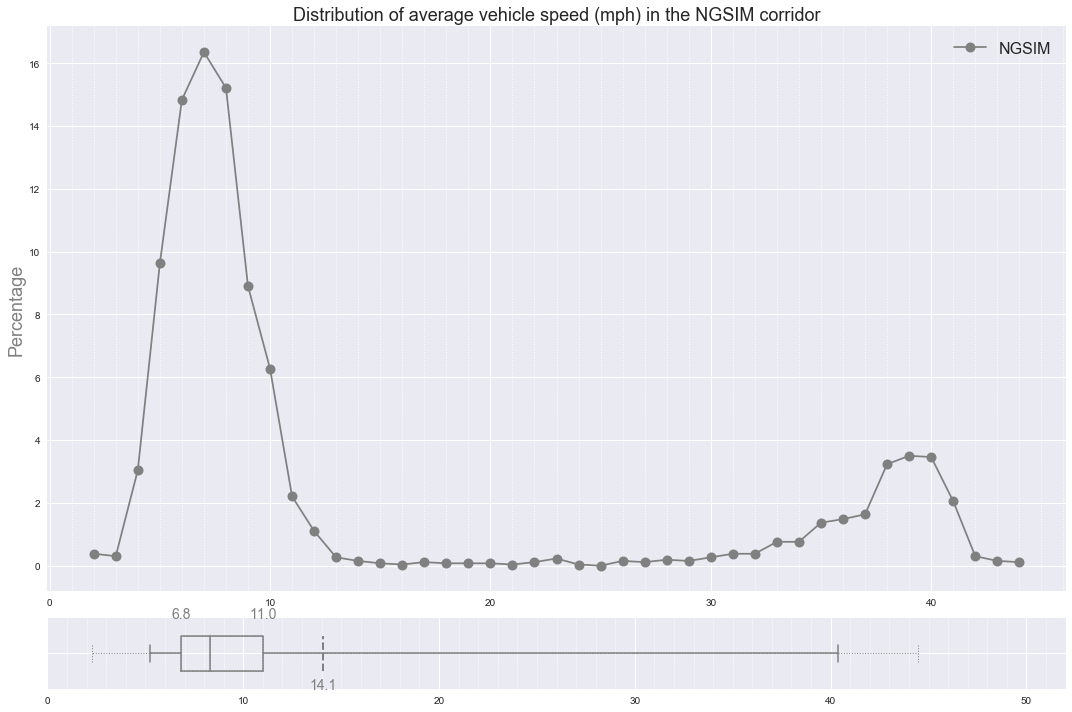

In [30]:
#plt.figure(figsize=(8.5 * 2,11 * 2))
fig = plt.figure(figsize=(15,10))

gs = mpl.gridspec.GridSpec(2, 1,height_ratios=[8, 1])

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0])


matplotlibCharts.plotSingleHistLine(ax1, ai_times, 'speed', np.arange(0,52,1), lineParams={'label':'NGSIM', 'color':'grey'})

ax1.legend(fontsize=16)

minor_locator = mpl.ticker.AutoMinorLocator(10)
ax1.xaxis.set_minor_locator(minor_locator)

ax1.grid(b=True, which='major', color='white', lw=1)
ax1.grid(b=True, which='minor', color='white', linestyle="dotted", alpha=1.0)
        
matplotlibCharts.myBoxPlot(ax2, ai_times, 'speed', 'grey', 
            10, axis_min=0, axis_max=52, mean_horizontal_label_shift=0.5)

ax1.set_title("Distribution of average vehicle speed (mph) in the NGSIM corridor", fontsize=18)
ax1.set_ylabel('Percentage', color='grey', fontsize=18)

fig.tight_layout()
#fig.savefig(os.path.join(OUT_FOLDER, "Average veh speeds.png"))

In [ ]:
ai2.groupby(['laneIndex'])['speed'].mean().reset_index()

## Bining for Heatmap and Traffic Flow calculations

In [41]:
LCR_TIME_BIN = 10 # seconds 
LCR_SPACE_BIN = 100 # in feet


ai2['spacebin'] = np.array(ai2.dist_along // LCR_SPACE_BIN, np.int)
ai2['timebin'] = pd.to_datetime(((ai2.time.astype(np.int64) // 
                                 (LCR_TIME_BIN * 1e9) ) * (LCR_TIME_BIN * 1e9) ))


In [32]:
ai2.timebin.unique().shape

(30,)

## Calculate the speed heatmap table 

In [42]:
ai_speed_hm = (ai2.groupby(['laneIndex', 'spacebin', 'timebin'])['speed']
                   .mean() )

ai_speed_hm = (ai_speed_hm.to_frame()
                          .reset_index() ) 

mi = pd.MultiIndex.from_product([sorted(ai2.laneIndex.unique()), 
                                 sorted(ai2.spacebin.unique()), 
                                 ai2.timebin.unique()], 
                                 names=['laneIndex', 'spacebin', 'timebin'])
mi = pd.DataFrame(index=mi)
mi.reset_index(inplace=True)


ai_speed_hm = ai_speed_hm.merge(mi, on=['laneIndex', 'spacebin', 'timebin'], how='right')
ai_speed_hm = ai_speed_hm.set_index(['laneIndex', 'spacebin', 'timebin']).unstack()

ai_speed_hm = ai_speed_hm.sort_index(level=[0,1], ascending=[True, True])


In [43]:
ai_speed_hm.head(10)

speed                      \
timebin            2005-04-13 17:00:00 2005-04-13 17:00:10   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  24.896774           29.591923   
          5                  28.678519           30.889474   
          6                  32.564211           31.907368   
          7                  34.120385           33.276538   
          8                  35.283667           34.994000   
          9                  37.278214           36.425185   

                                                            \
timebin            2005-04-13 17:00:20 2005-04-13 17:00:30   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  31.249062           32.481667   
          5                  32.093077           32.955000   
          6                  33.199706           33.871905   
          7                  34.025556           34.933696   
          8                  35.010571           35.901136   
          9                  36.129655           36.836667   

                                                            \
timebin            2005-04-13 17:00:40 2005-04-13 17:00:50   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  32.763529           33.262000   
          5                  33.609000           34.023810   
          6                  34.540714           34.519444   
          7                  35.520333           35.462500   
          8                  36.367812           36.467500   
          9                  37.235294           37.361579   

                                                            \
timebin            2005-04-13 17:01:00 2005-04-13 17:01:10   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  33.873600           34.565455   
          5                  34.526471           35.560000   
          6                  35.090312           36.012692   
          7                  35.980400           36.650000   
          8                  37.018261           37.169630   
          9                  37.736923           37.782692   

                                                            \
timebin            2005-04-13 17:01:20 2005-04-13 17:01:30   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                  34.829583           34.682917   
          5                  35.377000           35.376389   
          6                  35.944074           36.071429   
          7                  36.632000           36.990000   
          8                  37.368182           37.800625   
          9                  38.182941           38.517308   

## Calculate the speed and density heatmap table

In [44]:
ai_hm = (ai2.groupby(['laneIndex', 'spacebin', 'timebin'])['speed']
                  .aggregate([np.mean, np.size]))

ai_hm = (ai_hm.reset_index()
              .rename(columns={'size':'density', 'mean':'speed'}) ) 

mi = pd.MultiIndex.from_product([sorted(ai2.laneIndex.unique()), 
                                 sorted(ai2.spacebin.unique()), 
                                 ai2.timebin.unique()], 
                                 names=['laneIndex', 'spacebin', 'timebin'])
mi = pd.DataFrame(index=mi)
mi.reset_index(inplace=True)
#
#
ai_hm = ai_hm.merge(mi, on=['laneIndex', 'spacebin', 'timebin'], how='right')
ai_hm = ai_hm.set_index(['laneIndex', 'spacebin', 'timebin'])


### the simulation time step is 0.2 seconds this is why I am multiplying by 5 below 
ai_hm['density'] = ai_hm['density'] * (5280 / LCR_SPACE_BIN) / (LCR_TIME_BIN * 5)

In [45]:
ai_hm.head()

speed  density
laneIndex spacebin timebin                                
1         4        2005-04-13 17:00:00  24.896774   32.736
                   2005-04-13 17:00:10  29.591923   27.456
                   2005-04-13 17:00:20  31.249062   33.792
                   2005-04-13 17:00:30  32.481667   31.680
                   2005-04-13 17:00:40  32.763529   17.952

Text(0.88,0.02,'SpaceBin:100ft\nTimeBin:10sec')

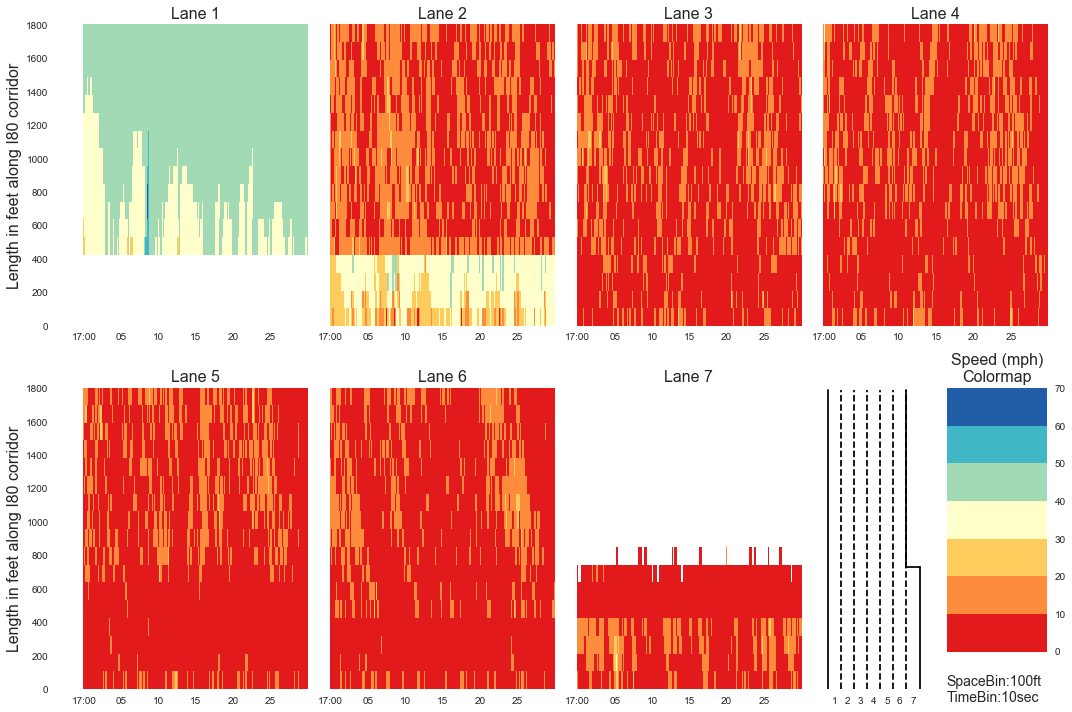

In [46]:
fig = plt.figure(figsize=(15,10))
gs = mpl.gridspec.GridSpec(2, 9, 
        width_ratios=[0.05, 1, 1, 1, 1, 1, 1, 1, 1])

ax_milepost1 = fig.add_subplot(gs[0,0])
ax_l1 = fig.add_subplot(gs[0,1:3])
ax_l2 = fig.add_subplot(gs[0,3:5])
ax_l3 = fig.add_subplot(gs[0,5:7])
ax_l4 = fig.add_subplot(gs[0,7:])

ax_milepost2 = fig.add_subplot(gs[1,0])
ax_l5 = fig.add_subplot(gs[1,1:3])
ax_l6 = fig.add_subplot(gs[1,3:5])
ax_l7 = fig.add_subplot(gs[1,5:7])
ax_schema = fig.add_subplot(gs[1,7])
ax_colormap = fig.add_subplot(gs[1,8])

ax_lanes = [ax_l1, ax_l2, ax_l3, ax_l4, ax_l5, ax_l6, ax_l7]


bounds = [-10, 0, 10, 20, 30, 40, 50, 60, 70]

colors2 = ['white', '#e31a1c','#fd8d3c', '#fecc5c','#ffffcc','#a1dab4','#41b6c4','#225ea8']

cmap = mpl.colors.ListedColormap(colors2) 
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

cb = None 
ax = None

dtmin = (ai2.time.max() - ai2.time.min()).total_seconds() / 60
scale =  ai_speed_hm.shape[1] / dtmin # (ticks per minute )

HEATMAP_Y_LENGTH = 1801

for i in range(1, 8):
    
    ax = ax_lanes[i-1]
    
    nan_mask = np.isnan(ai_speed_hm.loc[i].values)
    tmp = ai_speed_hm.loc[i].values.copy()
    tmp[nan_mask] = -1

    cb = ax.imshow(tmp, cmap=cmap, norm=norm, origin='lower', aspect='auto')
    
    ax.set_title("Lane %d" % i, fontsize=16)
    
    dtmin = (ai2.time.max() - ai2.time.min()).total_seconds() / 60
    scale =  ai_speed_hm.shape[1] / dtmin # (ticks per minute )
    x_ticks_replace = scale * np.arange(0, dtmin, 5) 
    ax.set_xticks(x_ticks_replace)
    #ax.set_xticklabels(np.arange(0, int(dtmin), 5)) 
    ax.set_xticklabels(["17:00", "05", "10", "15", "20", '25'])
    
    #ax.set_ylim([-0.5, int(HEATMAP_Y_LENGTH / LCR_SPACE_BIN) + 0.5] )
    #y_ticks_replace = np.arange(0, HEATMAP_Y_LENGTH, 200)/LCR_SPACE_BIN - 0.5
    
    #ax.set_yticks(y_ticks_replace) 
    
    #ax.set_yticks(np.arange(-0.5, ai2.spacebin.max() + 0.5, 2))
    
    #ax.grid(True, color='black', ls='dashed', lw=0.3)
    
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_facecolor('white')
    

ytick_labels = [i for i in range(0,HEATMAP_Y_LENGTH,200)]
ax_milepost1.set_ylim([0, HEATMAP_Y_LENGTH])
ax_milepost1.set_yticks(ytick_labels)
ax_milepost1.set_yticklabels(ytick_labels)
ax_milepost1.set_xticklabels([])
ax_milepost1.grid(False)
ax_milepost1.set_ylabel("Length in feet along I80 corridor", fontsize=16)
ax_milepost1.set_facecolor('white')


ax_milepost2.set_yticks(ytick_labels)
ax_milepost2.set_ylim([0, HEATMAP_Y_LENGTH])
ax_milepost2.set_yticklabels(ytick_labels)
ax_milepost2.set_xticklabels([])
ax_milepost2.grid(False)
ax_milepost2.set_ylabel("Length in feet along I80 corridor", fontsize=16)
ax_milepost2.set_facecolor('white')

mpl.colorbar.ColorbarBase(ax=ax_colormap, cmap=cmap, norm=norm, boundaries=bounds) 

#fig.colorbar(cb, cax=ax_colormap, cmap=cmap, norm=norm, boundaries=bounds, ticks=bounds)
ax_colormap.set_title("Speed (mph)\nColormap", fontsize=16)
cm_yticklabels = ['', '0', '10', '20', '30', '40', '50', '60', '70']
ax_colormap.set_yticklabels(cm_yticklabels)


dy=10
ax_schema.plot([0,0], [0, 1790], color='black')
ax_schema.plot([dy,dy], [0, 1790], color='black', ls='dashed')
ax_schema.plot([2*dy,2*dy], [0, 1790], color='black',ls='dashed')
ax_schema.plot([3*dy,3*dy], [0, 1790], color='black', ls='dashed')
ax_schema.plot([4*dy,4*dy], [0, 1790], color='black', ls='dashed')
ax_schema.plot([5*dy,5*dy], [0, 1790], color='black', ls='dashed')
ax_schema.plot([6*dy,6*dy], [0, 1790], color='black', ls='dashed')
ax_schema.plot([6*dy,6*dy], [730, 1790], color='black')
ax_schema.plot([7*dy,7*dy], [0, 730], color='black')
ax_schema.plot([6*dy,7*dy], [730, 730], color='black')

ax_schema.set_xticks([dy/2 + i*dy for i in range(0,7)])
ax_schema.set_xticklabels([i for i in range(1,8)])

#ax_schema.annotate()

ax_schema.set_ylim([0,HEATMAP_Y_LENGTH])
ax_schema.set_yticklabels([])

ax_schema.set_facecolor('white')
ax_schema.grid(False)

fig.tight_layout()
fig.text(0.88, 0.02, "SpaceBin:%dft\nTimeBin:%dsec" % 
          (LCR_SPACE_BIN, LCR_TIME_BIN), fontsize=14)

#fig.savefig(os.path.join(OUT_FOLDER, "speed heatmap.png"))

## Trajectories 

In [ ]:

for lane in [1,2,3,4,5,6,7]:
    
    fig = plt.figure(figsize=(15,10), dpi=150)

    rect = 0.06,0.06,0.90,0.9
    ax = fig.add_axes(rect)

    fig.add_axes(ax)

    bounds = [0, 10, 20, 30, 40, 50, 60, 70, 80]
    colors2 = ['#e31a1c','#fd8d3c', '#fecc5c','#ffffcc','#a1dab4','#41b6c4','#225ea8', '#000000']
    cmap = mpl.colors.ListedColormap(colors2) 
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

    group = None 
    for newVehId, group in ai2[ai2.timeSta < 18000 + 600].set_index('laneIndex').loc[lane].groupby('oid'):

        colors = group.speed.apply(lambda spd: 
                                      colors2[int(spd // 10)]).values

        #times = group.FrameID.values / 10
        #times = (group.time.values - START_TIME).astype('int') / 1e9
        times = group.timeSta.values - 18000
        locations = group.dist_along.values
        #locations = group.locY.values 
        #colors= group.color.values


        ax.scatter(times, locations, c=colors, s=0.5)
        ax.scatter(times[0],   locations[0],   c=colors[0], s=4)
        ax.scatter(times[-1], locations[-1], c=colors[-1], s=4)

    ax.set_facecolor('white')
    ax.set_xlabel("Time (seconds from 5:00PM)",fontsize=18)
    ax.set_ylabel("Distance from Start (feet)", fontsize=18)

    cmax = fig.add_axes([0.96, 0.1, 0.02, 0.8])
    mpl.colorbar.ColorbarBase(ax=cmax, cmap=cmap, norm=norm, boundaries=bounds) 

    majorLocator = MultipleLocator(60)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(5)

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_minor_locator(minorLocator)

    #max_time_sec = np.max((ai2.time - START_TIME).astype('int') / 1e9)

    #ax.set_xlim([0, np.max(ai2.FrameID/10)])
    ax.set_ylim([0, ai2.dist_along.max()])

    ax.set_axisbelow(True)
    ax.grid(color='grey', lw=1, linestyle='dashed', alpha=0.2)
    #fig.tight_layout()
 
    fig.savefig(os.path.join(OUT_FOLDER, "traj lane %d.png" % lane), dpi=150)
    break 

In [ ]:
ai_hm.head()

In [47]:
ai_hm_mean = (ai_hm.groupby(ai_hm.density.values // 5 * 5)['speed'].aggregate([np.mean, np.size])
                      .reset_index()
                      .rename(columns={'index':'density', 'mean':'mean_speed'}))

ai_hm_mean.head(20)

,density,mean_speed,size
0,0.0,12.161250,8.0
1,5.0,39.693384,69.0
2,10.0,40.757270,204.0
3,15.0,40.106470,414.0
4,20.0,38.363366,644.0
5,25.0,37.967758,911.0
6,30.0,33.888203,679.0
7,35.0,25.459185,367.0
8,40.0,18.782062,363.0
9,45.0,13.905847,422.0


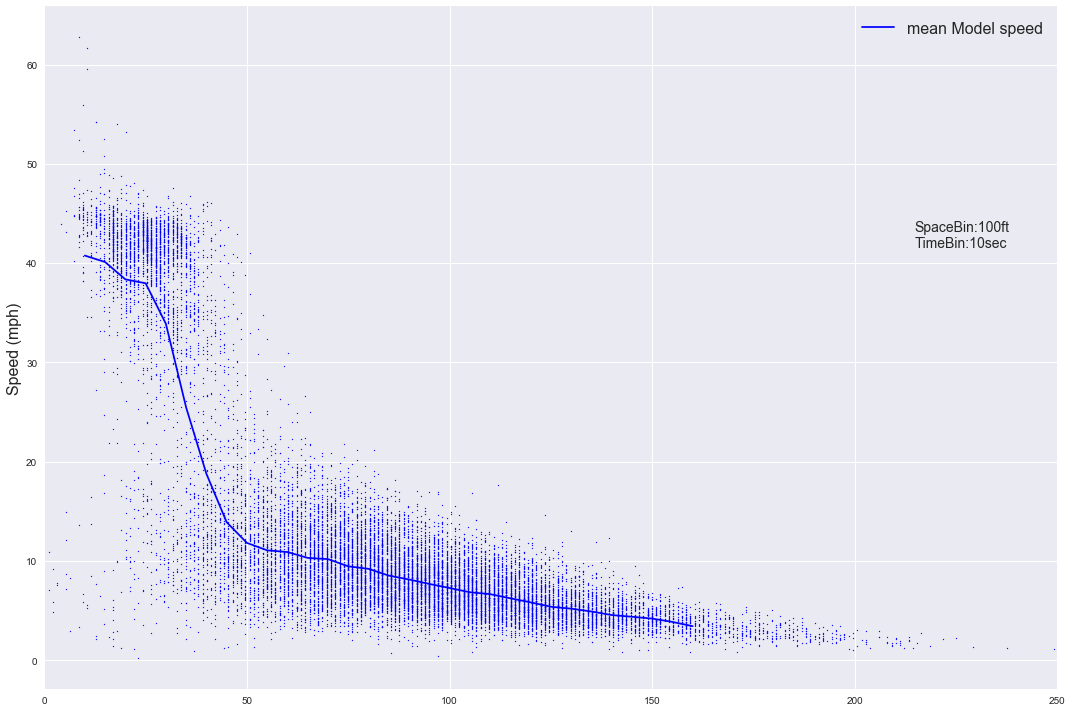

In [48]:
fig, ax1 = plt.subplots(figsize=(15,10))

grey_points = ax1.scatter(ai_hm.density, ai_hm.speed, s=1, color='blue', label=None)

ax1.set_xlim([0,250])
tmp = ai_hm_mean[ai_hm_mean['size'] > 100]
mean_line = ax1.plot(tmp.density, tmp.mean_speed, c='blue', label="mean Model speed")
ax1.legend(fontsize=16)

ax1.legend(fontsize=16)

ax1.set_ylabel("Speed (mph)", fontsize=16)
ax2.set_xlabel('Density (vpm)', fontsize=16)

#ax1.set_title("  Data", fontsize=18)
#fig.legend(handles=[grey_points, blue_points], labels=['NGSIM', "Model"], fontsize=18)
fig.text(0.85, 0.65, "SpaceBin:%dft\nTimeBin:%dsec" % (LCR_SPACE_BIN, LCR_TIME_BIN), fontsize=14)

fig.tight_layout()

#fig.savefig(os.path.join(OUT_FOLDER, "density vs speed all.png"))

/Users/michailxyntarakis/anaconda/envs/py36_2/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


Text(0.72,0.13,'SpaceBin:100ft\nTimeBin:10sec')

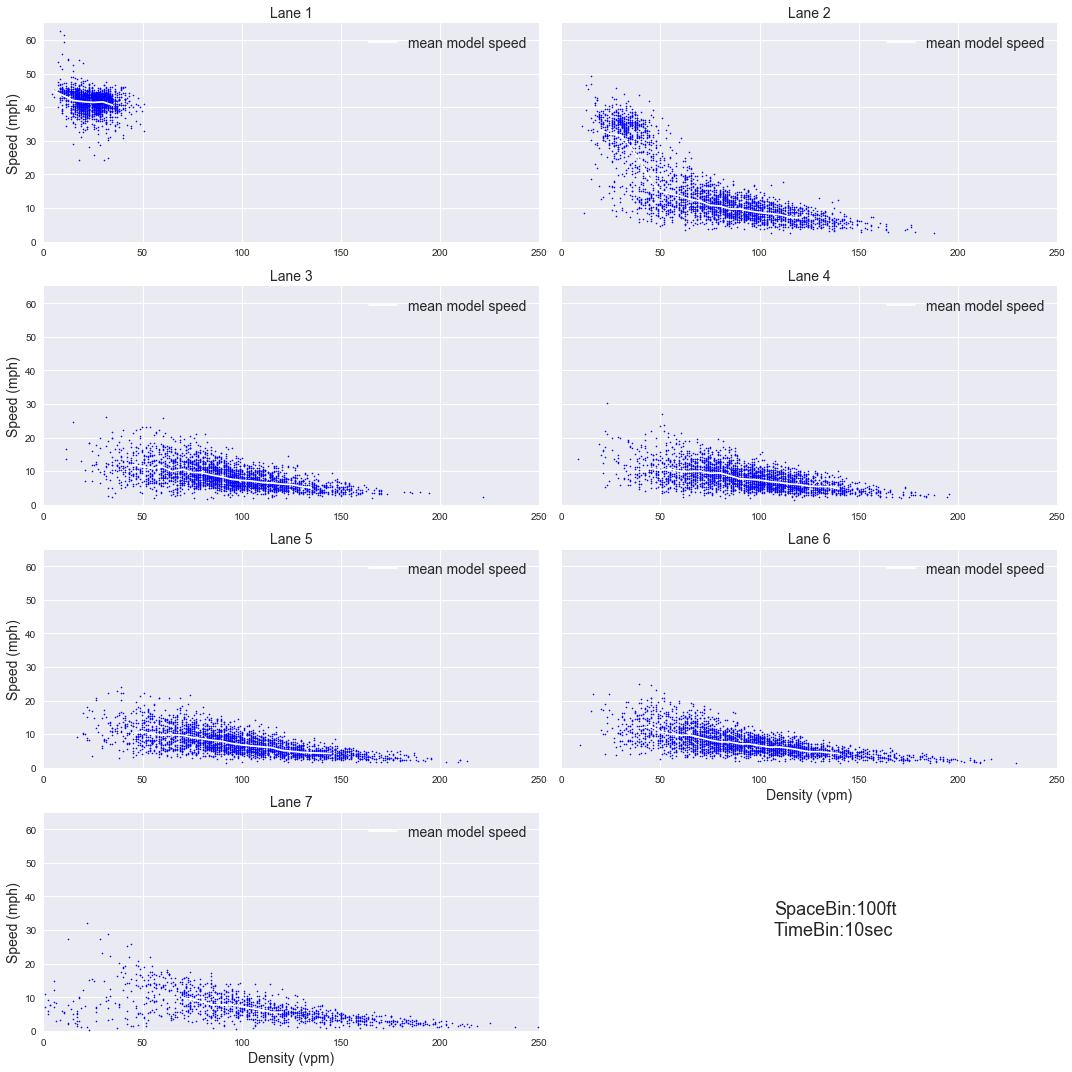

In [50]:
fig = plt.figure(figsize=(15, 15))

gs = mpl.gridspec.GridSpec(4, 2)

for laneNum in range(1, 8):
    
    i = (laneNum - 1) // 2
    j = (laneNum - 1) % 2 
    
    ax = plt.subplot(gs[i,j])
    
    tmp = ai_hm.loc[laneNum]
    
    
    ax.scatter(tmp.density, tmp.speed, s=1.5, color='blue', label=None)
    ax.set_xlim([0,250])
    ax.set_ylim([0,65])
    ax.set_title("Lane %d" % laneNum, fontsize=14)
    
    tmp_mean = (tmp.groupby(tmp.density.values // 5 * 5)['speed']
                      .aggregate([np.mean, np.size])
                      .reset_index()
                      .rename(columns={'index':'density', 'mean':'mean_spd'}))
    
    tmp_mean = tmp_mean[tmp_mean['size'] > 50]
    
    ax.plot(tmp_mean.density, tmp_mean.mean_spd, c='white', label='mean model speed')
    
    if j == 1:
        ax.set_yticklabels([])
        
    if j == 0:
        ax.set_ylabel("Speed (mph)", fontsize=14)
        
    ax.legend(fontsize=14)

plt.subplot(gs[3,0]).set_xlabel("Density (vpm)", fontsize=14)
plt.subplot(gs[2,1]).set_xlabel("Density (vpm)", fontsize=14)

fig.tight_layout()
fig.text(0.72, 0.13, "SpaceBin:%dft\nTimeBin:%dsec" % (LCR_SPACE_BIN, LCR_TIME_BIN), fontsize=18)
#fig.savefig(os.path.join(OUT_FOLDER, "  density vs speed per lane.png"))

In [ ]:
print('hello')

<h1> Physical Limits </h1> 

In [37]:
g = 32
accelBins = [-6*g, -5*g, -4*g, -3*g, -2*g, -1*g, -0.6*g]
accelBins = [-4*g, -3*g, -2*g, -1*g, -0.6*g]

accelBinLabels = ['-6g to -5g', '-5g to -4g', '-4g to -3g', '-3g to -2g', '-2g to -1g', '-1g to -0.6g']
accelBinLabels = [ '-4g to -3g', '-3g to -2g', '-2g to -1g', '-1g to -0.6g']
accelBins

hist, bins = np.histogram(ai2.acceleration, accelBins)
ai_accelHist = pd.DataFrame(data={'model freq':hist}, index=accelBinLabels)

ai_accelHist.to_csv(os.path.join(OUT_FOLDER, 'accel limits.csv'))
ai_accelHist

,model freq
-4g to -3g,3
-3g to -2g,133
-2g to -1g,2447
-1g to -0.6g,2400


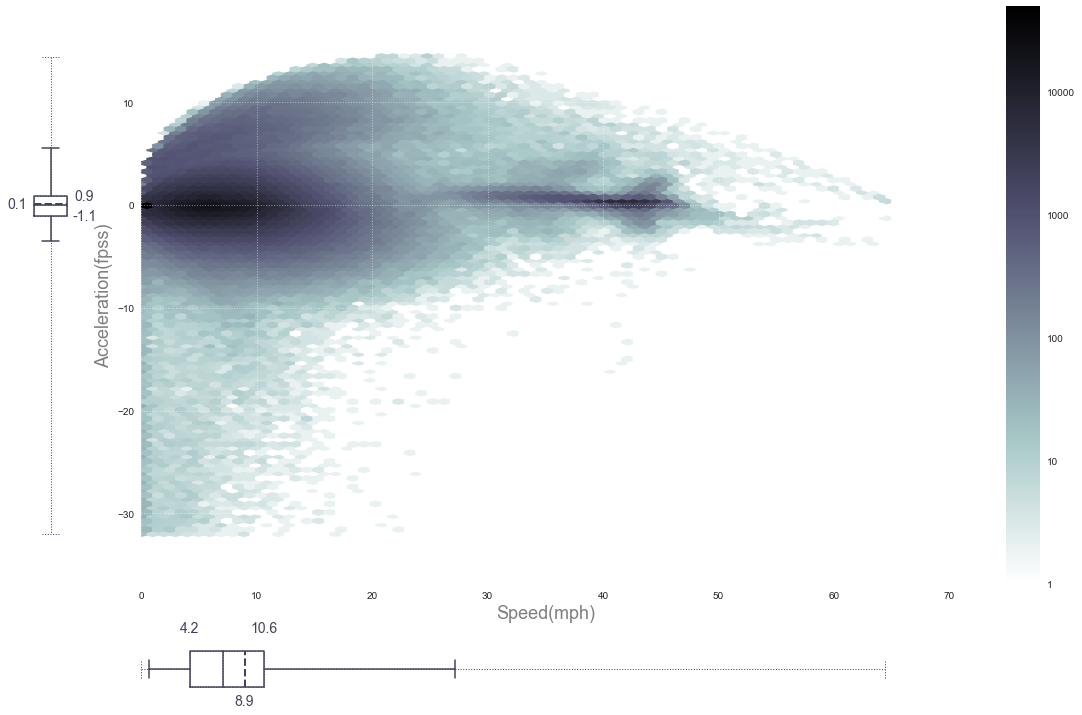

In [38]:
fig = plt.figure(figsize=(15,10))

gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[8, 1], width_ratios=[1, 12, 0.5])

ax2 = plt.subplot(gs[0,1])
ax1 = plt.subplot(gs[0,0])#, sharey=ax2)

ax3 = plt.subplot(gs[0,2])

ax4 = plt.subplot(gs[1,1])#, sharex=ax2)

tmp = ai2[ai2.acceleration > -32]

cmap = plt.cm.bone_r

#gridsize=(65, int((120+15)/2))
gridsize=(65, 56)


cb = ax2.hexbin(tmp.speed, tmp.acceleration, bins='log', gridsize=gridsize, cmap=cmap)

ax2.set_xlim([0, 70])
cbar = fig.colorbar(cb, cax=ax3) 
ax3.set_yticklabels([1, 10, 100, 1000, 10000])

#cbar.ax.set_yticklabels(['1', '10', '100', '1000', '10000'])  # vertically oriented colorbar
ax2.set_facecolor('white')

xmin, xmax = ax2.get_xlim() 
ymin, ymax = ax2.get_ylim()
#plot horizontal gridlines
for y  in [-30, -20, -10, 0, 10]:
    ax2.plot([xmin, xmax], [y,y], lw=1, color='white', alpha=0.5, ls="dotted")
for x in range(0,70,10):
    ax2.plot([x, x], [ymin, ymax], lw=1, color='white', alpha=0.5, ls="dotted")

#ax2.set_title("Two-Dimensional Distribution of Instantaneous   Acceleration by Speed\nbin size is 1mph by 1fpss", fontsize=18, color='grey')
ax2.set_xlabel("Speed(mph)",fontsize=18, color='grey')
ax2.set_ylabel("Acceleration(fpss)", fontsize=18, color='grey')

plt.setp( ax2.get_xticklabels(), visible=True)


matplotlibCharts.myBoxPlot(ax4, tmp, 'speed', cmap(0.7), mean_horizontal_label_shift=0.5)
ax4.set_facecolor('white')
ax4.set_xticklabels([])
ax4.set_xlim(ax2.get_xlim())

matplotlibCharts.myBoxPlot(ax1, tmp, 'acceleration', cmap(0.7), vert=True, mean_vertical_label_shift=0.5)

ax1.set_xticklabels([])
ax1.set_ylim(ax2.get_ylim())
ax1.set_facecolor('white')

fig.tight_layout() 

fig.savefig(os.path.join(OUT_FOLDER, "instantaneous speed vs accel.png"))


In [39]:
def calculatePercentiles(df, fieldName, grouper):
    
    stats = df.groupby(grouper)[fieldName].agg({'mean': np.mean,
                                               'size': np.size, 
                                               'min': np.min, 
                                               'max': np.max,
                                               'std': np.std, 
                                               'pct5': lambda x:np.percentile(x, 5),
                                               'pct25': lambda x:np.percentile(x, 25),
                                               'pct95': lambda x:np.percentile(x, 95),
                                               'pct75': lambda x:np.percentile(x, 75), 
                                               'pct99': lambda x:np.percentile(x, 99),
                                               'pct1': lambda x:np.percentile(x, 1),
                                               'pct999': lambda x:np.percentile(x, 99.9),
                                               'pct01': lambda x:np.percentile(x, 0.1)                                               
                                              })
    return stats

In [40]:
ai_spd_acc_stats = calculatePercentiles(ai2, 'acceleration', 
                                        np.array(ai2.speed, np.int))

C:\Users\mxyntarakis\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  from ipykernel import kernelapp as app


In [41]:
ai_spd_acc_stats.head()

,mean,size,min,max,std,pct5,pct25,pct95,pct75,pct99,pct1,pct999,pct01
0,-0.969978,94755.0,-106.20,4.53,5.704586,-3.37,-0.44,1.64,0.00,3.8900,-34.9292,4.44000,-60.59460
1,-0.376599,63788.0,-119.10,6.16,4.316319,-3.30,-1.10,3.89,0.93,5.0300,-16.8478,5.70000,-53.80704
2,-0.194220,84730.0,-77.28,7.49,3.743761,-3.17,-1.05,4.26,0.92,6.0271,-7.9571,7.00000,-48.52065
3,-0.120527,106236.0,-87.16,8.33,3.339457,-3.04,-1.00,4.18,0.84,6.4200,-6.4065,7.43000,-45.94245
4,-0.031240,124104.0,-75.84,9.15,2.844818,-3.00,-0.96,4.28,0.82,6.9900,-6.0400,8.38897,-33.54764


In [42]:
mpl.rc('ytick', labelsize=14)
mpl.rc('xtick', labelsize=14)

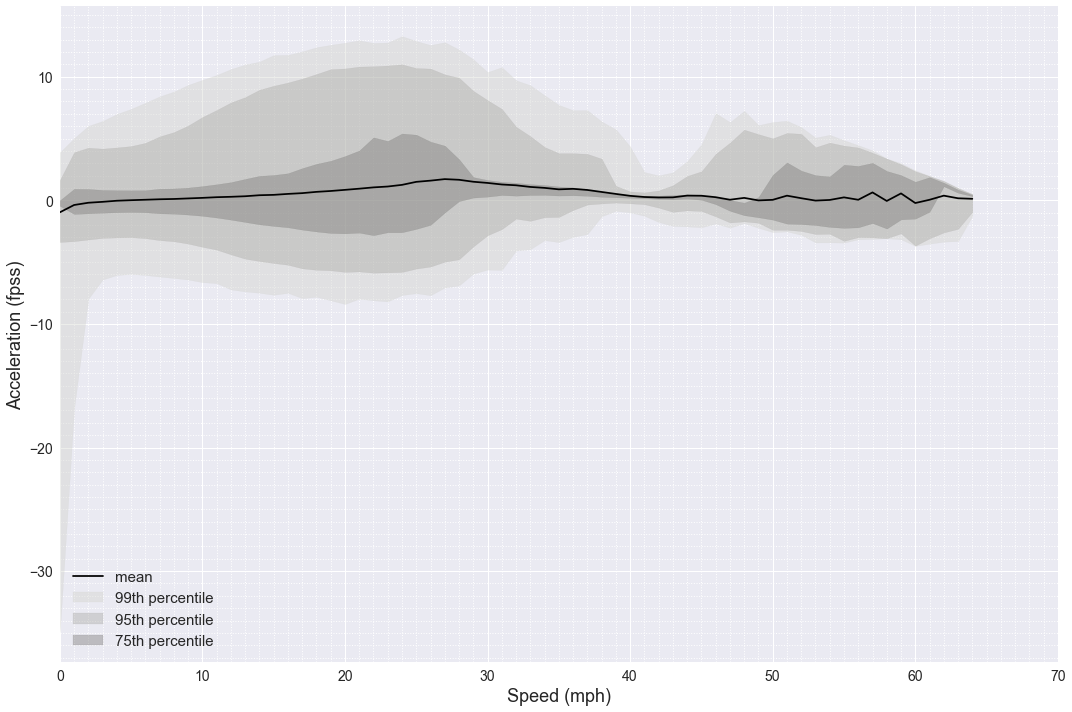

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

df = ai_spd_acc_stats.iloc[:]
#ax.fill_between(df.index, y1=df.pct999, y2=df.pct01, color = ccolors.t2, alpha=0.9)

ax.fill_between(df.index, y1=df.pct99, y2=df.pct1, color = ccolors.t3,   alpha=0.4, label='99th percentile')
ax.fill_between(df.index, y1=df.pct95, y2=df.pct5, color = ccolors.t5,    alpha=0.4, label='95th percentile')
ax.fill_between(df.index, y1=df.pct75, y2=df.pct25, color = ccolors.t7,   alpha=0.4, label='75th percentile')
ax.plot(df.index, df['mean'], color='k', label='mean')
ax.set_xlim([0, 70])

#ax.set_xlim([0, 60])
xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
ax.yaxis.set_minor_locator(yminorLocator)
ax.xaxis.set_minor_locator(xminorLocator)
ax.grid(b=True, which='minor', color='white', linestyle="dotted", alpha=1.0)

#ax.set_facecolor('white')
#ax.set_facecolor((0.9176470588235294, 0.9176470588235294, 0.9490196078431372, 1.0))

#ax.set_axisbelow(False)

#ax.set_title("Percentile Acceleration Distribution by Speed in the  ", fontsize=18)
ax.set_ylabel("Acceleration (fpss)", fontsize=18)
ax.set_xlabel("Speed (mph)", fontsize=18)
ax.legend(loc=3, fontsize=15)

fig.tight_layout() 

fig.savefig(os.path.join(OUT_FOLDER, " Percentile Acceleration Distribution by Speed.png"))

In [44]:
#H, xedges, yedges = np.histogram2d(ai2.vehSpeed, ai2.vehAcceleration,
#                                   bins=[np.arange(0, 50,1), np.arange(-16.0,16.0,1)], normed=True)


# NUM_INTERVALS = 10
# bounds = np.arange(0, H.max())
# bounds = np.linspace(0, H.max(), NUM_INTERVALS)
# bounds = list(bounds)
# bounds.insert(0, -1)
# bounds[1] = 0.00001

# colors = [] 
# for i in np.linspace(0, 1, NUM_INTERVALS):
#     c = plt.cm.bone_r(i)
#     colors.append(c)


# fig, ax = plt.subplots(figsize=(15, 10))

# cmap = mpl.colors.ListedColormap(colors) 
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #ax.hist(H.flat, bins=np.linspace(0, H.max(), 10) , log=True, alpha=0.5)
# ax.imshow(H.T, cmap=cmap)


# #bins=np.arange(0, 0.026, 0.001)
# ax.set_title("hello")

# #import brewer2mpl

# #bmap = brewer2mpl.get_map('Greys', 'Sequential', 9)
# #bmap.hex_colors

# fig, ax = plt.subplots(figsize=(15, 10))

# cmap = mpl.colors.ListedColormap(colors) 
# norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# #ax.hist(H.flat, bins=np.linspace(0, H.max(), 10) , log=True, alpha=0.5)
# ax.hist2d(ai2.vehSpeed, ai2.vehAcceleration, 
#                 bins=[np.arange(0, 50,1), np.arange(-16,16,1)], normed=True, 
#                  cmap=cmap)




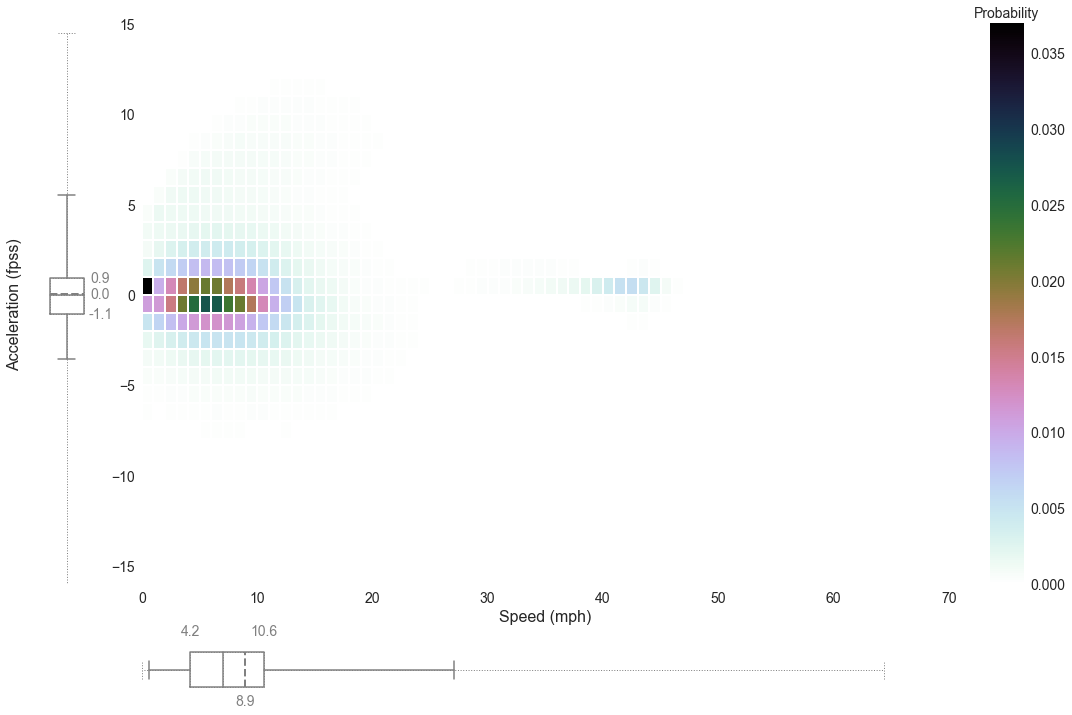

In [45]:
fig = plt.figure(figsize=(15,10))

gs = mpl.gridspec.GridSpec(2, 3, height_ratios=[8, 1], 
                           width_ratios=[1, 12, 0.5])


ax1 = plt.subplot(gs[0,0])#, sharey=ax2)
ax2 = plt.subplot(gs[0,1])
ax3 = plt.subplot(gs[0,2])
ax4 = plt.subplot(gs[1,1])#, sharex=ax2)


#tmp = ai2[ai2.acceleration > -32]

counts, xedges, yedges, Image = ax2.hist2d(ai2.speed, ai2.acceleration, 
          bins=[np.arange(0, 71,1), np.arange(-16,16,1)], normed=True,
          cmap=plt.cm.cubehelix_r)

#minor_locator = mpl.ticker.AutoMinorLocator(1)
#ax1.xaxis.set_minor_locator(minor_locator)

xminorLocator = MultipleLocator(1)
yminorLocator = MultipleLocator(1)
ax2.yaxis.set_minor_locator(yminorLocator)
ax2.xaxis.set_minor_locator(xminorLocator)


ax2.grid(b=True, which='major', color='white', lw=2)
ax2.grid(b=True, which='minor', color='white', lw=2, alpha=1.0)

ax2.set_xlabel('Speed (mph)', fontsize=16)
ax1.set_ylabel('Acceleration (fpss)', fontsize=16)


matplotlibCharts.myBoxPlot(ax4, ai2, 'speed', 'grey', mean_horizontal_label_shift=0.5)
ax4.set_facecolor('white')
ax4.set_xticklabels([])
ax4.set_xlim(ax2.get_xlim())

matplotlibCharts.myBoxPlot(ax1, ai2, 'acceleration', 'grey', vert=True)# mean_vertical_label_shift=0.4, vert=True)

ax1.set_xticklabels([])
ax1.set_ylim(ax2.get_ylim())
ax1.set_facecolor('white')

#ax.set_facecolor('grey')
fig.colorbar(Image, cax=ax3)
ax3.set_title("Probability", fontsize=14)
#ax2.set_title("2D Histogram of Instantaneous Speed vs Acceleration", fontsize=18)

fig.tight_layout()
fig.savefig(os.path.join(OUT_FOLDER, "2D Histogram of Instantaneous Speed vs Acceleration.png"))

In [46]:
# fig = plt.figure(figsize=(15,20))

# gs = mpl.gridspec.GridSpec(4, 3, height_ratios=[8,8, 8, 1], width_ratios=[1, 12, 0.5])

# ax2 = plt.subplot(gs[0,1])
# ax1 = plt.subplot(gs[0,0])#, sharey=ax2)
# ax3 = plt.subplot(gs[0,2])

# ax_pct = plt.subplot(gs[1,1]) #sharex=ax2, sharey=ax2)#, sharex=ax2)
# ax_2dh  = plt.subplot(gs[2,1])#, sharex=ax2, sharey=ax2)#, sharex=ax2)


# ##### FIRST PLOT 

# tmp = ai2[ai2.acceleration > -32]
# cmap = plt.cm.bone_r

# gridsize=(65, 56)

# cb = ax2.hexbin(tmp.speed, tmp.acceleration, bins='log', gridsize=gridsize, cmap=cmap)

# ax2.set_xlim([0, 70])
# ax2.set_ylim([-32, 20])

# cbar = fig.colorbar(cb, cax=ax3) 
# ax3.set_yticklabels([1, 10, 100, 1000, 10000])

# ax2.set_facecolor('white')

# xmin, xmax = ax2.get_xlim() 
# ymin, ymax = ax2.get_ylim()
# #plot horizontal gridlines
# for y  in [-30, -20, -10, 0, 10]:
#     ax2.plot([xmin, xmax], [y,y], lw=1, color='white', alpha=0.5, ls="dotted")
# for x in range(0,70,10):
#     ax2.plot([x, x], [ymin, ymax], lw=1, color='white', alpha=0.5, ls="dotted")

# #ax2.set_title("Two-Dimensional Distribution of Instantaneous   Acceleration by Speed\nbin size is 1mph by 1fpss", fontsize=18, color='grey')
# ax2.set_xlabel("Speed(mph)",fontsize=18, color='grey')
# ax2.set_ylabel("Acceleration(fpss)", fontsize=18, color='grey')


# ################# SECOND PLOT 

# df = ai_spd_acc_stats.iloc[:43]


# ax_pct.fill_between(df.index, y1=df.pct99, y2=df.pct1, color = ccolors.t3,   alpha=0.4, label='99th percentile')
# ax_pct.fill_between(df.index, y1=df.pct95, y2=df.pct5, color = ccolors.t5,    alpha=0.4, label='95th percentile')
# ax_pct.fill_between(df.index, y1=df.pct75, y2=df.pct25, color = ccolors.t7,   alpha=0.4, label='75th percentile')
# ax_pct.plot(df.index, df['mean'], color='k', label='mean')
# ax_pct.set_xlim([0, 70])

# #ax.set_xlim([0, 60])
# xminorLocator = MultipleLocator(1)
# yminorLocator = MultipleLocator(1)
# ax_pct.yaxis.set_minor_locator(yminorLocator)
# ax_pct.xaxis.set_minor_locator(xminorLocator)
# ax_pct.grid(b=True, which='minor', color='white', linestyle="dotted", alpha=1.0)

# #ax.set_facecolor('white')
# #ax.set_facecolor((0.9176470588235294, 0.9176470588235294, 0.9490196078431372, 1.0))

# #ax.set_axisbelow(False)

# #ax.set_title("Percentile Acceleration Distribution by Speed in the  ", fontsize=18)
# #ax.set_ylabel("Acceleration (fpss)", fontsize=18)
# #ax.set_xlabel("Speed (mph)", fontsize=18)

# ax_pct.legend(loc=1, fontsize=15)

# ax_pct.set_xlim([0, 70])
# ax_pct.set_ylim([-32, 20])


# ############## THIRD PLOT 

# counts, xedges, yedges, Image = ax_2dh.hist2d(ai2.speed, ai2.acceleration, 
#           bins=[np.arange(0, 50,1), np.arange(-32,20,1)], normed=True,
#          cmap=plt.cm.cubehelix_r)

# #minor_locator = mpl.ticker.AutoMinorLocator(1)
# #ax1.xaxis.set_minor_locator(minor_locator)

# xminorLocator = MultipleLocator(1)
# yminorLocator = MultipleLocator(1)
# ax_2dh.yaxis.set_minor_locator(yminorLocator)
# ax_2dh.xaxis.set_minor_locator(xminorLocator)


# ax_2dh.grid(b=True, which='major', color='white', lw=2)
# ax_2dh.grid(b=True, which='minor', color='white', lw=2, alpha=1.0)

# #ax_2dh.set_xlabel('Speed (mph)', fontsize=16)
# #ax1.set_ylabel('Acceleration (fpss)', fontsize=16)

# #ax_2dh.set_xlim([0, 70])
# #ax_2dh.set_ylim([-32, 20])


# fig.tight_layout() 



#plt.setp( ax2.get_xticklabels(), visible=True)

<h2> Upsample to 1 second </h2>

In [47]:
ai2 = ai2.sort_values(['oid', 'time'])
ai2.index = np.arange(ai2.shape[0])

result = [] 
for VehId, group in ai2.groupby('oid'):
    
    tmp2 = (group[['time', 'acceleration', 'speed',  'dist_along']]
           .set_index('time')
           .resample('1s')
           .mean()
           .reset_index()
           )
    
    tmp2['oid'] = VehId
    
    tmp2['jerk'] = tmp2.acceleration.shift(-1) - tmp2.acceleration
    result.append(tmp2)

ai1s = pd.concat(result)
ai1s = ai1s.merge(ai2[['oid', 'time', 'laneIndex']])
ai1s = ai1s.dropna()

In [48]:
ai1s.head()

,time,acceleration,speed,dist_along,oid,jerk,laneIndex
0,2005-04-13 17:00:00,-0.268,6.332,1607.990676,1021,1.070,2
1,2005-04-13 17:00:01,0.802,6.508,1617.294659,1021,0.500,2
2,2005-04-13 17:00:02,1.302,7.954,1628.056625,1021,-0.084,2
3,2005-04-13 17:00:03,1.218,9.412,1641.026933,1021,0.002,2
5,2005-04-13 17:00:00,2.338,10.728,1631.032228,1029,0.782,6


In [49]:
ai1s.oid.unique().shape

(2625,)

## Vehicle Acceleration 

In [50]:
describe(ai1s.acceleration)

,stats
count,297356.0
NA,0.0
mean,0.0
std,2.4
min,-25.1
ptc5,-3.5
pct25,-1.0
pct50,-0.0
ptc75,0.9
pct95,4.3


In [51]:
hist, bins = np.histogram(ai1s.acceleration, np.arange(-21.5, 11.5, 1))

acc_freq = pd.DataFrame(index=bins[:-1], data=hist, columns=['freq'])
labels = ["%.1f <= acc < %.1f" % (i, i+1) for i in bins[:-1]]
acc_freq.index = labels

acc_freq[' _Percentage'] = acc_freq['freq'] / ai1s.shape[0] * 100
acc_freq.to_clipboard()
#acc_freq.to_csv(os.path.join(OUT_FOLDER, "  Acceleration.csv"))
acc_freq

,freq,_Percentage
-21.5 <= acc < -20.5,0,0.000000
-20.5 <= acc < -19.5,1,0.000336
-19.5 <= acc < -18.5,2,0.000673
-18.5 <= acc < -17.5,2,0.000673
-17.5 <= acc < -16.5,7,0.002354
-16.5 <= acc < -15.5,10,0.003363
-15.5 <= acc < -14.5,24,0.008071
-14.5 <= acc < -13.5,38,0.012779
-13.5 <= acc < -12.5,86,0.028922
-12.5 <= acc < -11.5,135,0.045400


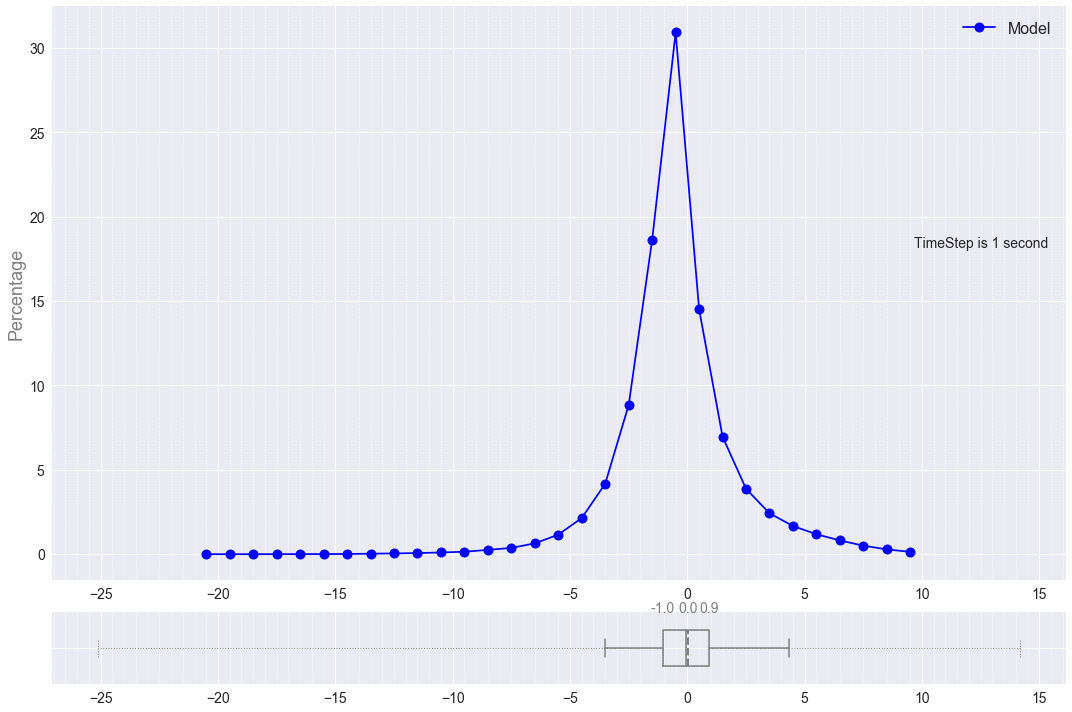

In [52]:
fig = plt.figure(figsize=(15, 10))

gs = mpl.gridspec.GridSpec(2, 1,height_ratios=[8, 1])

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0], sharex=ax1)

matplotlibCharts.plotSingleHistLine(ax1, ai1s, 'acceleration',
            np.arange(-21.5, 11.5, 1), lineParams={'label':'Model', 'color':'blue'})

ax1.legend(fontsize=16)

minor_locator = mpl.ticker.AutoMinorLocator(1)
ax1.xaxis.set_minor_locator(minor_locator)

ax1.grid(b=True, which='major', color='white', lw=1)
ax1.grid(b=True, which='minor', color='white', linestyle="dotted", alpha=1.0)
        
matplotlibCharts.myBoxPlot(ax2, ai1s,  'acceleration','grey', 10) #axis_min=0, axis_max=65)

#ax1.set_title("Distribution of Acceleration Jerk in the NGSIM corridor\nTime step is 1 second", fontsize=18)
ax1.set_ylabel('Percentage', color='grey', fontsize=18)

fig.text(0.85, 0.65, "TimeStep is 1 second", fontsize=14)
fig.tight_layout()

fig.savefig(os.path.join(OUT_FOLDER, "Distribution of Acceleration.png"))

## Acceleration Jerk

In [53]:
describe(ai1s.jerk)

,stats
count,297356.0
NA,0.0
mean,0.0
std,2.9
min,-29.6
ptc5,-4.7
pct25,-0.8
pct50,0.0
ptc75,0.9
pct95,4.5


In [54]:
hist, bins = np.histogram(ai1s.jerk, bins=np.array([-200, -50, -15, -3, 3, 15, 50, 200]))

jerk_freq = pd.DataFrame(index=bins[:-1], data=hist, columns=['freq'])
labels = ["%0.f to %0.f" % (i,j) for i,j in zip(bins, bins[1:])]
jerk_freq.index = labels

jerk_freq[' _Percentage'] = jerk_freq['freq'] / ai1s.shape[0] * 100
#jerk_freq.to_clipboard()
jerk_freq.to_csv(os.path.join(OUT_FOLDER, "Jerk.csv"))
jerk_freq

,freq,_Percentage
-200 to -50,0,0.000000
-50 to -15,321,0.107951
-15 to -3,26086,8.772650
-3 to 3,243483,81.882659
3 to 15,27335,9.192685
15 to 50,131,0.044055
50 to 200,0,0.000000


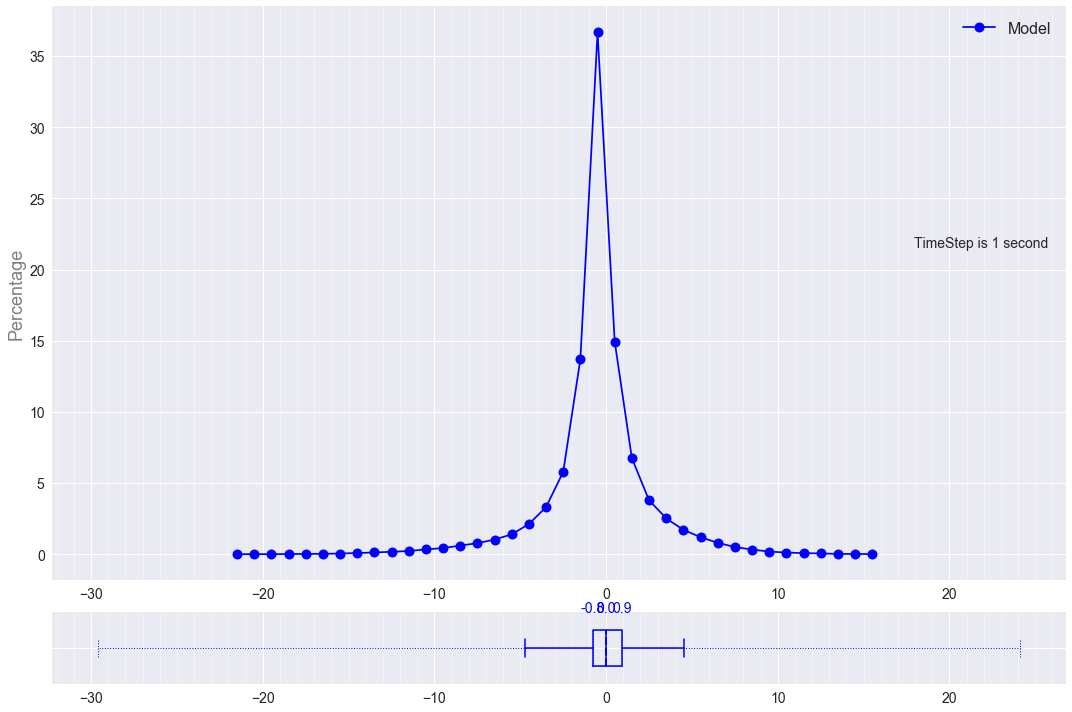

In [55]:
fig = plt.figure(figsize=(15, 10))

gs = mpl.gridspec.GridSpec(2, 1,height_ratios=[8, 1])

ax1 = plt.subplot(gs[0,0])
ax2 = plt.subplot(gs[1,0], sharex=ax1)

matplotlibCharts.plotSingleHistLine(ax1, ai1s, 'jerk',
            np.arange(-21.5, 17.5, 1), lineParams={'label':'Model', 'color':'blue'})

ax1.legend(fontsize=16)

minor_locator = mpl.ticker.AutoMinorLocator(1)
ax1.xaxis.set_minor_locator(minor_locator)

ax1.grid(b=True, which='major', color='white', lw=1)
ax1.grid(b=True, which='minor', color='white', linestyle="dotted", alpha=1.0)
        
matplotlibCharts.myBoxPlot(ax2, ai1s,  'jerk','blue', 10) #axis_min=0, axis_max=65)

#ax1.set_title("Distribution of Acceleration Jerk in the NGSIM corridor\nTime step is 1 second", fontsize=18)
ax1.set_ylabel('Percentage', color='grey', fontsize=18)

fig.tight_layout()
fig.text(0.85, 0.65, "TimeStep is 1 second", fontsize=14)

fig.savefig(os.path.join(OUT_FOLDER, "Distribution of Acceleration Jerk.png"))


## ARMS

In [56]:
result = [] 

for sbin, group in ai2.groupby(np.array(ai2.speed, np.int) // 5 * 5 ):

    arms = np.sqrt(np.sum(group.acceleration.dropna().values ** 2) / group.shape[0]) * 0.303
    

    result.append((sbin, arms, group.shape[0]))
    #break 

arms = pd.DataFrame(result, columns=['speedbin', 'arms', 'n'])

arms.to_csv(os.path.join(OUT_FOLDER, "ARMS.csv"))

arms.head(10)

,speedbin,arms,n
0,0,1.225819,473613
1,5,0.840984,601255
2,10,1.051382,258667
3,15,1.369392,70397
4,20,1.606851,17823
5,25,1.439549,6998
6,30,0.792542,9907
7,35,0.473915,17700
8,40,0.240201,40355
9,45,0.409225,2904


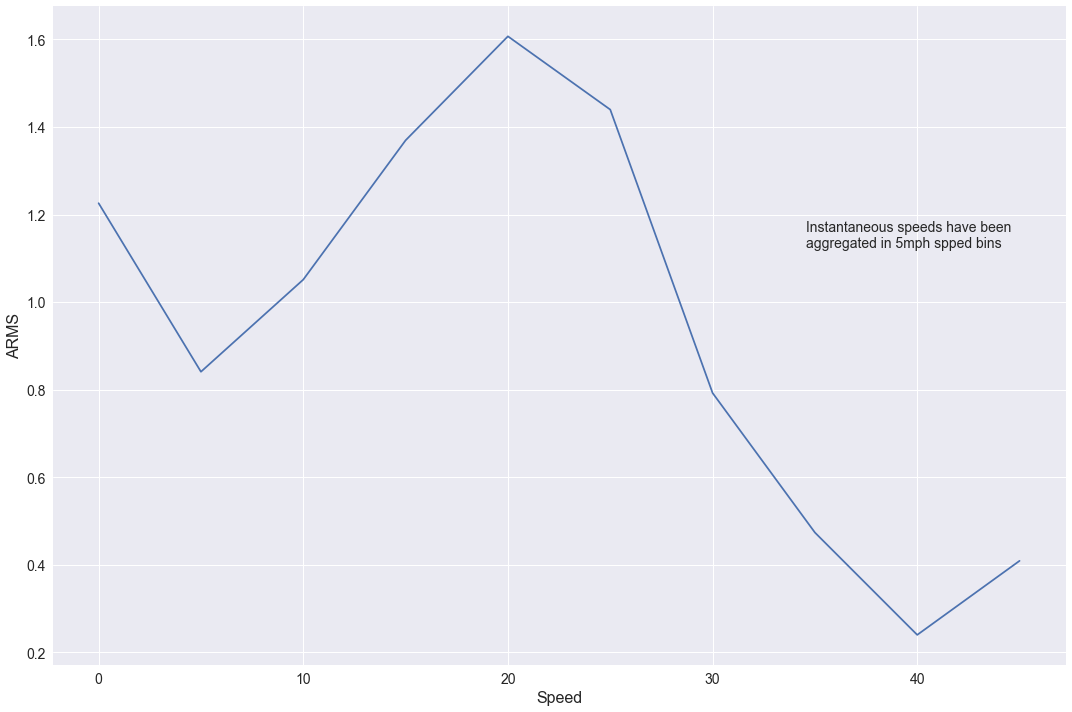

In [57]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(arms[arms.speedbin <=45].speedbin, arms[arms.speedbin <=45].arms)

ax.set_ylabel('ARMS', fontsize=16)
ax.set_xlabel('Speed', fontsize=16)

fig.tight_layout()
fig.text(0.75, 0.65, "Instantaneous speeds have been \naggregated in 5mph spped bins", fontsize=14)

fig.savefig(os.path.join(OUT_FOLDER, "ARMS.png"))


### Standard Deviation of Acceleration 

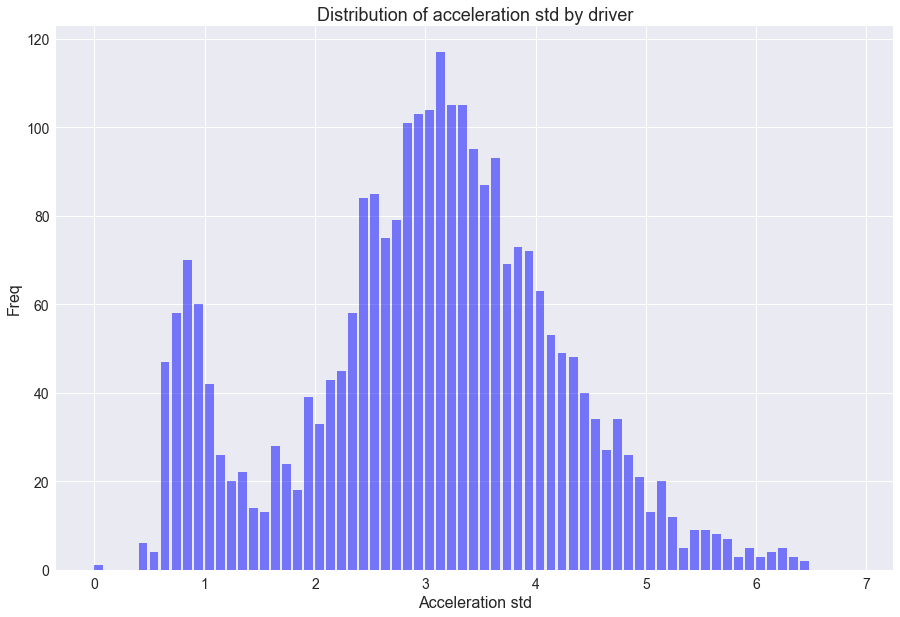

In [58]:
ai_veh_acc_std = (ai2.groupby('oid')['acceleration'].std()
                  .to_frame().reset_index()
                  .rename(columns={'acceleration':'accel_std'}) )
#ai_veh_acc_std.head()

fig, ax = plt.subplots(figsize=(15,10))
ax.hist(ai_veh_acc_std.accel_std.dropna(), bins=np.arange(0,7,0.1), alpha=0.5, 
        color='blue',width=0.08)
ax.set_title('Distribution of acceleration std by driver', fontsize=18)
ax.set_xlabel('Acceleration std', fontsize=16)
ax.set_ylabel("Freq", fontsize=16)

# Lane Changing

In [59]:
ai2 = ai2.sort_values(['oid', 'time'])
ai2.index = np.arange(ai2.shape[0])

ai2['laneChange'] = 0
ai2.loc[ai2.laneIndex != ai2.laneIndex.shift(-1), 'laneChange'] = 1
ai2.loc[ai2.oid != ai2.oid.shift(-1), 'laneChange'] = 0

ai2['laneChangeA'] = 0
ai2.loc[ai2.laneIndex != ai2.laneIndex.shift(1), 'laneChangeA'] = 1
ai2.loc[ai2.oid != ai2.oid.shift(1), 'laneChangeA'] = 0

In [60]:
tmp = ai2.groupby('laneIndex')['laneChange'].sum().to_frame().reset_index()
tmp.rename(columns={'laneChange':"NumOfVehiclesLeavingLane"}, inplace=True)
tmp['NumOfVehiclesEnteringLane'] = ai2.groupby('laneIndex')['laneChangeA'].sum().to_frame().reset_index()['laneChangeA']
tmp

,laneIndex,NumOfVehiclesLeavingLane,NumOfVehiclesEnteringLane
0,1,0,541
1,2,1126,1086
2,3,1730,1755
3,4,1668,1713
4,5,1534,1561
5,6,1261,1259
6,7,795,199


In [61]:
LCR_TIME_BIN = 60 # seconds 
LCR_SPACE_BIN = 100 # in feet


ai2['spacebin'] = np.array(ai2.dist_along // LCR_SPACE_BIN, np.int)
ai2['timebin'] = pd.to_datetime(((ai2.time.astype(np.int64) // 
                                 (LCR_TIME_BIN * 1e9) ) * (LCR_TIME_BIN * 1e9) ))


In [62]:
ai_laneChangeRates = (ai2.groupby(['laneIndex', 'spacebin', 'timebin'])['laneChange']
                   .sum()
                  )

ai_laneChangeRates = ai_laneChangeRates * (3600 / LCR_TIME_BIN) * (5280 / LCR_SPACE_BIN) 

ai_laneChangeRates = ai_laneChangeRates.to_frame().reset_index()
#ai_laneChangeRates = ai_laneChangeRates.rename(columns={'lane':'laneIndex'})

mi = pd.MultiIndex.from_product([sorted(ai2.laneIndex.unique()), 
                                 sorted(ai2.spacebin.unique()), 
                                 ai2.timebin.unique()], 
                                 names=['laneIndex', 'spacebin', 'timebin'])

mi = pd.DataFrame(index=mi)
mi.reset_index(inplace=True)

ai_laneChangeRates = ai_laneChangeRates.merge(mi, on=['laneIndex', 'spacebin', 'timebin'], how='right')

ai_laneChangeRates = ai_laneChangeRates.set_index(['laneIndex', 'spacebin', 'timebin']).unstack()

ai_laneChangeRates.head()

laneChange                      \
timebin            2005-04-13 17:00:00 2005-04-13 17:01:00   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                        0.0                 0.0   

                                                            \
timebin            2005-04-13 17:02:00 2005-04-13 17:03:00   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                        0.0                 0.0   

                                                            \
timebin            2005-04-13 17:04:00 2005-04-13 17:05:00   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                        0.0                 0.0   

                                                            \
timebin            2005-04-13 17:06:00 2005-04-13 17:07:00   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                        0.0                 0.0   

                                                            \
timebin            2005-04-13 17:08:00 2005-04-13 17:09:00   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                        0.0                 0.0   

                           ...                              \
timebin                    ...         2005-04-13 17:20:00   
laneIndex spacebin         ...                               
1         0                ...                         NaN   
          1                ...                         NaN   
          2                ...                         NaN   
          3                ...                         NaN   
          4                ...                         0.0   

                                                            \
timebin            2005-04-13 17:21:00 2005-04-13 17:22:00   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                        0.0                 0.0   

                                                            \
timebin            2005-04-13 17:23:00 2005-04-13 17:24:00   
laneIndex spacebin                                           
1         0                        NaN                 NaN   
          1                        NaN                 NaN   
          2                        NaN                 NaN   
          3                        NaN                 NaN   
          4                        0.0                 0.0   

                                                    

In [63]:
ai_laneChangeRates.max().max()

69696.0

C:\Users\mxyntarakis\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


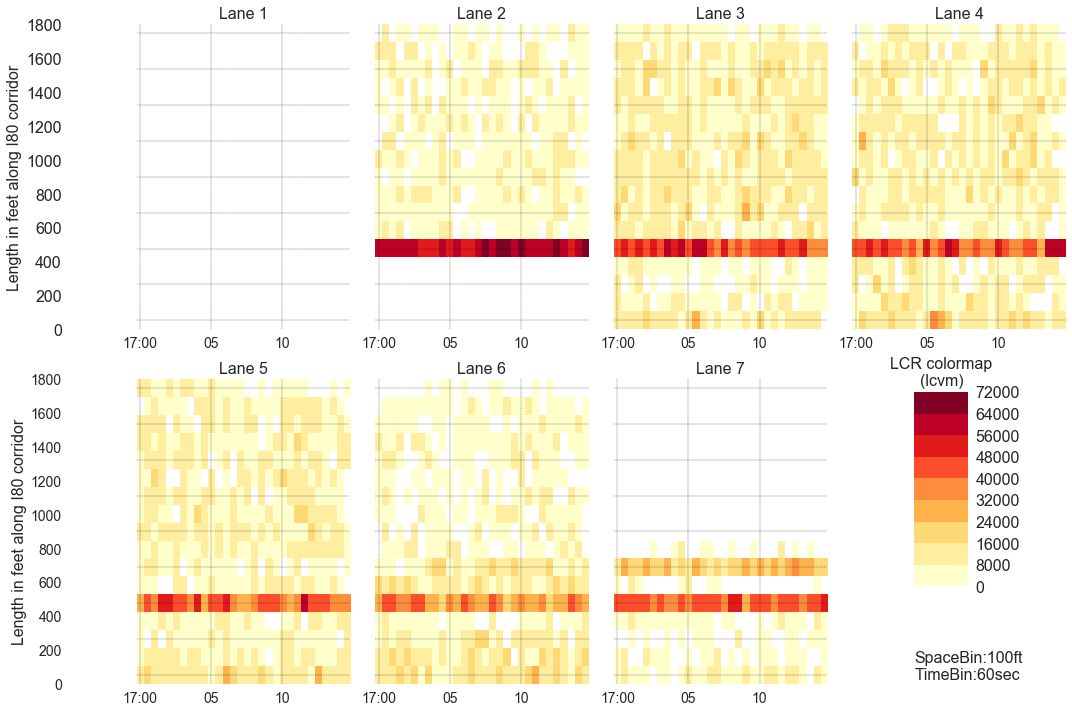

In [64]:
#fig = plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(15,10))

gs = mpl.gridspec.GridSpec(2, 5, width_ratios=[0.2, 1, 1, 1, 1])

#bounds = list(np.linspace(0, ng_laneChangeRates.max().max(), 10)) 
MAX_LCR = 72000
bounds = list(np.linspace(0, MAX_LCR, 10))
bounds.insert(0, -10)
bounds[1] = 0.1

colors = ['white', '#ffffcc','#ffeda0','#fed976','#feb24c','#fd8d3c','#fc4e2a','#e31a1c','#bd0026','#800026']
cmap = mpl.colors.ListedColormap(colors) 
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

assert len(bounds) == len(colors) + 1

cb = None 

ax = None
for i in range(1, 8):
    
    j = (i-1) % 4
    k = (i-1) // 4
    ax = plt.subplot(gs[k,j+1])
    
    data = ai_laneChangeRates.loc[i].values
    nan_mask = np.isnan(data)
    tmp = data.copy()
    tmp[nan_mask] = -1
    tmp

    cb = ax.imshow(tmp, cmap=cmap, norm=norm, origin='lower', aspect='auto')
    #cb = ax.imshow(tmp, origin='lower')
    
    ax.set_xticklabels(['', '17:00', '05', '10', '15', ''])
    #x_ticklabels = ["", "5:00", "5", "10", "15", '20', '25', '30']
    #ax.set_xticklabels(x_ticklabels, fontsize=15)

    ax.set_yticklabels([])
    
    ax.grid(True, color='black', ls='dashed', lw=0.3)
    
    ax.set_title("Lane %d" % i, fontsize=16)
    
cmax = fig.add_axes([0.85, 0.15, 0.05, 0.3])

fig.colorbar(cb, cax=cmax, norm=norm, boundaries=bounds, ticks=bounds)
cmax.set_title("LCR colormap\n(lcvm)", fontsize=16)

cm_labels = ["%d" % i for i in list(map(int, bounds))]
cm_labels[0] = "" 
cmax.set_yticklabels(cm_labels, fontsize=16)


ax1 = plt.subplot(gs[0,0]) #, sharey=plt.subplot(gs[0,1]))
ax2 = plt.subplot(gs[1,0]) #, sharey=plt.subplot(gs[1,1]))

ytick_labels = [i for i in range(0,2000,200)]
ax1.set_yticks(ytick_labels)
ax1.set_yticklabels(ytick_labels, fontsize=16)
ax1.set_xticklabels([])
ax1.grid(False)
ax1.set_ylabel("Length in feet along I80 corridor", fontsize=16)
ax1.set_facecolor('white')

ax2.set_yticks(ytick_labels)
ax2.set_yticklabels(ytick_labels, fontsize=14)
ax2.set_xticklabels([])
ax2.grid(False)
ax2.set_ylabel("Length in feet along I80 corridor", fontsize=16)
ax2.set_facecolor('white')

fig.text(0.85, 0.05, "SpaceBin:%dft\nTimeBin:%dsec" % 
          (LCR_SPACE_BIN, LCR_TIME_BIN), fontsize=16)

fig.tight_layout()

fig.savefig(os.path.join(OUT_FOLDER, 'LCR.png'))

# Safety 

In [65]:
ai2 = ai2.sort_values(['laneIndex', 'time', 'dist_along'])
ai2.index = np.arange(ai2.shape[0])

ai2['TTCs'] = ai2.dist_headway2 / (ai2.speed - ai2.speed.shift(-1))
ai2.loc[ai2.laneIndex != ai2.laneIndex.shift(-1), 'TTCs'] = np.nan
ai2.loc[ai2.TTCs < 0, 'TTCs'] = np.nan

In [66]:
ai2[['laneIndex', 'time', 'dist_along', 'oid']].head()

,laneIndex,time,dist_along,oid
0,1,2005-04-13 17:00:00,621.367587,1330
1,1,2005-04-13 17:00:00,751.417070,1323
2,1,2005-04-13 17:00:00,795.332471,1318
3,1,2005-04-13 17:00:00,992.529965,1316
4,1,2005-04-13 17:00:00,1214.215287,1217


In [67]:
hist, bins = np.histogram(ai2.TTCs.dropna(), bins=np.arange(0, 15, 1), range=[0,15])
ai_TTC_freq = pd.DataFrame(index=bins[:-1], data=hist, columns=['freq'])
labels = ["%d <= TTC < %d" % (i, i+1) for i in bins[:-1]]
ai_TTC_freq.index = labels
ai_TTC_freq['aiPercentage'] = ai_TTC_freq['freq'] / ai2.shape[0] * 100
ai_TTC_freq.to_clipboard()
ai_TTC_freq

,freq,aiPercentage
0 <= TTC < 1,283,0.018868
1 <= TTC < 2,1247,0.083140
2 <= TTC < 3,3535,0.235684
3 <= TTC < 4,11795,0.786392
4 <= TTC < 5,21401,1.426840
5 <= TTC < 6,27032,1.802268
6 <= TTC < 7,29541,1.969547
7 <= TTC < 8,29698,1.980015
8 <= TTC < 9,29507,1.967280
9 <= TTC < 10,27945,1.863139


## Safety events 

In [68]:
describe(ai2.dist_headway2)

,stats
count,1499888.0
NA,63007.0
mean,59.3
std,40.2
min,1.7
ptc5,23.8
pct25,36.3
pct50,49.6
ptc75,69.0
pct95,122.4


In [69]:
ai2[ai2.dist_headway2 < 6].shape

(4, 24)

In [70]:
ai2[(ai2.TTCs < 2) & (ai2.acceleration < -15)].shape

(2, 24)

In [71]:
ai2[ai2.TTCs < 2.4].shape

(2376, 24)

In [72]:
safety_events = pd.DataFrame(index=['collisions', 'safety events', 'warnings'],
                   data={'numOfEvents':[0, 475, 812]})

safety_events.loc['collisions', 'numOfEvents'] = 4
safety_events.to_csv(os.path.join(OUT_FOLDER, "safety events.csv"))
safety_events

,numOfEvents
collisions,4
safety events,475
warnings,812


## Lane Change Urgency 

In [73]:
hist, bins = np.histogram(ai2[ai2.laneChange == 1]['TTCs'].dropna(), bins=[0, 3, 5.5, 1000000], range=[0, 1000000])

ai_LCU = pd.DataFrame(index=bins[:-1], data=hist, columns=['freq'])
ai_LCU.index = ['Forced', 'Urgent', 'Non-urgent']

ai_LCU['percentage'] = ai_LCU.freq / ai_LCU.freq.sum() * 100

ai_LCU.to_csv(os.path.join(OUT_FOLDER, "LCU.csv"))

ai_LCU

,freq,percentage
Forced,843,17.602840
Urgent,640,13.363959
Non-urgent,3306,69.033201


## Lane Change Severity 

In [74]:
ai2 = ai2.sort_values(['laneIndex', 'time', 'dist_along'], 
                      ascending=[True, True, True])
ai2.index = np.arange(ai2.shape[0])

In [75]:
ai2['follower_distance'] = ai2.dist_headway2.shift(1)
ai2['follower_speed'] = ai2.speed.shift(1)
ai2.loc[ai2.time != ai2.time.shift(1), 'follower_distance'] = np.nan
ai2.loc[ai2.laneIndex != ai2.laneIndex.shift(1), 'follower_distance'] = np.nan
ai2.loc[ai2.time != ai2.time.shift(1), 'speed'] = np.nan
ai2.loc[ai2.laneIndex != ai2.laneIndex.shift(1), 'speed'] = np.nan

In [76]:
ai2['Tr'] = (ai2.follower_distance - 30) / (ai2.follower_speed * 5260/3600)
ai2.loc[ai2.laneChange != 1, 'Tr'] = np.nan
ai2.loc[ai2.follower_distance <= 30, 'Tr'] = np.nan
ai2.loc[ai2.Tr == np.inf, 'Tr'] = np.nan

In [77]:
describe(ai2.Tr)

,stats
count,1499888.0
NA,1493109.0
mean,3.0
std,9.2
min,0.0
ptc5,0.3
pct25,1.0
pct50,1.8
ptc75,3.2
pct95,7.9


In [78]:
hist, bins = np.histogram(ai2.Tr.dropna(), bins=[0, 1, 3, 5, 1000000])

ai_LCS = pd.DataFrame(index=bins[:-1], data=hist, columns=['freq'])
ai_LCS.index = ['4', '3', '2', '1']

ai_LCS['percentage'] = ai_LCS.freq / ai2.laneChange.sum() * 100

ai_LCS

,freq,percentage
4,1709,21.062361
3,3216,39.635198
2,1043,12.854326
1,811,9.995070
